In [ ]:
from google.colab import drive
drive.mount('/content/drive') #mount as it's faster than loading a csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt  #importing
import pandas as pd
import numpy as np
plt.style.use('dark_background') #dark mode

file_path = '/content/drive/MyDrive/Colab Notebooks/ford_ranger_prices.xlsx'     #Connecting to Google Drive
data = pd.read_excel(file_path)
print(data)

    Year  Min Price  Max Price
0   1992       8730      14840
1   1993       8781      16535
2   1994       9449      18328
3   1995      10224      19571
4   1996      10575      20295
5   1997      11070      20325
6   1998      11485      19695
7   1999      11845      19435
8   2000      11580      19785
9   2001      11960      24335
10  2002      12565      25010
11  2003      13645      25450
12  2004      14575      26015
13  2005      14610      26795
14  2006      14450      26670
15  2007      13970      24425
16  2008      14490      24350
17  2009      16395      25805
18  2010      17820      25800
19  2011      18160      26070
20  2019      24000      38565
21  2020      24110      38675
22  2021      24820      39035
23  2022      25980      39730
24  2023      27400      40945
25  2024      32720      55620


In [ ]:
years = data['Year'].values  # Extraction
minimum_price = data['Min Price'].values
maximum_price = data['Max Price'].values

all_years = set(range(years.min(), years.max() + 1))  #This is for missing years
existingyears = set(years)
missingyears = sorted(list(all_years - existingyears))
print("\nMissing Years:", missingyears)

years_mean = np.mean(years)
years_standard = np.std(years)
years_normalization = (years - years_mean) / years_standard  #normalization
print("\nNormalized Years:", years_normalization)


Missing Years: [2012, 2013, 2014, 2015, 2016, 2017, 2018]

Normalized Years: [-1.43131328 -1.32991233 -1.22851139 -1.12711045 -1.02570951 -0.92430857
 -0.82290763 -0.72150669 -0.62010575 -0.51870481 -0.41730387 -0.31590293
 -0.21450199 -0.11310105 -0.01170011  0.08970083  0.19110177  0.29250271
  0.39390365  0.49530459  1.30651212  1.40791306  1.509314    1.61071494
  1.71211588  1.81351682]


In [ ]:
def hypothesis(X, theta): #model/hypothesis
    return X.dot(theta)

def compute_cost(X, Y, theta): #cost
    m = len(Y)
    predictions = hypothesis(X, theta)
    errors = predictions - Y
    cost = (1 / (2 * m)) * np.dot(errors, errors)
    return cost

def gradient_descent(X, Y, theta, learning_rate, iterations): #gradient descent
    m = len(Y)
    cost_history = []
    for i in range(iterations):
        predictions = hypothesis(X, theta)
        errors = predictions - Y
        gradients = (1 / m) * (X.T.dot(errors))
        theta = theta - learning_rate * gradients
        cost = compute_cost(X, Y, theta)
        cost_history.append(cost)
        #print cost and theta
        if (i + 1) % 10 == 0:
            print(f"Iteration {i+1}: Cost = {cost:.4f}, Theta = {theta}")

    return theta, cost_history

In [ ]:
X_train = np.column_stack((np.ones_like(years_normalization), years_normalization))  #adding a bias
print("\nMatrix (First 10 Rows):") #checking if it works as intended
print(X_train[:10])


Matrix (First 10 Rows):
[[ 1.         -1.43131328]
 [ 1.         -1.32991233]
 [ 1.         -1.22851139]
 [ 1.         -1.12711045]
 [ 1.         -1.02570951]
 [ 1.         -0.92430857]
 [ 1.         -0.82290763]
 [ 1.         -0.72150669]
 [ 1.         -0.62010575]
 [ 1.         -0.51870481]]


In [ ]:
#intiailiazing parameters for our models
theta_min = np.zeros(2, dtype=float)  # theta_0, theta_1
theta_max = np.zeros(2, dtype=float)
learning_rate = 0.05 #learning rate can be changed as required to try various learning rate to find a suitable one
iterations = 100 #running for 100 iterations

print(f"\nTheta for Min Price: {theta_min}") #this is initial
print(f"Theta for Max Price: {theta_max}")


Theta for Min Price: [0. 0.]
Theta for Max Price: [0. 0.]


In [ ]:
print("\nTraining Linear Regression Model for Minimum Price...")
theta_min, cost_history_min = gradient_descent(X_train, minimum_price, theta_min, learning_rate, iterations)
print("\nTraining Linear Regression Model for Maximum Price...")
theta_max, cost_history_max = gradient_descent(X_train, maximum_price, theta_max, learning_rate, iterations)
#we trained linear regression  one for minimum price and one for maximum price


Training Linear Regression Model for Minimum Price...
Iteration 10: Cost = 53841925.2045, Theta = [6411.08795415 2491.2728246 ]
Iteration 20: Cost = 20056529.0447, Theta = [10249.64313301  3982.88989041]
Iteration 30: Cost = 7944940.1384, Theta = [12547.92791189  4875.97612691]
Iteration 40: Cost = 3603106.0175, Theta = [13923.9959059   5410.69984662]
Iteration 50: Cost = 2046619.6078, Theta = [14747.89864482  5730.8586899 ]
Iteration 60: Cost = 1488641.1414, Theta = [15241.19964895  5922.5496158 ]
Iteration 70: Cost = 1288613.7163, Theta = [15536.55718228  6037.32205405]
Iteration 80: Cost = 1216906.7002, Theta = [15713.39864777  6106.04055244]
Iteration 90: Cost = 1191200.7444, Theta = [15819.28016555  6147.18485583]
Iteration 100: Cost = 1181985.5212, Theta = [15882.67534143  6171.81947011]

Training Linear Regression Model for Maximum Price...
Iteration 10: Cost = 149925093.8420, Theta = [10835.70769281  3491.83754577]
Iteration 20: Cost = 57367226.6448, Theta = [17323.44615128  5

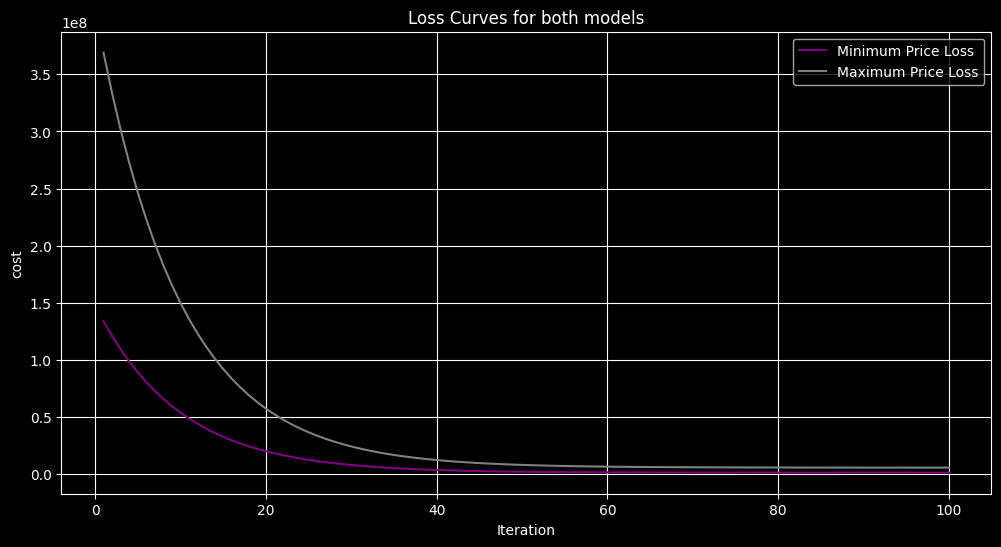

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, iterations + 1), cost_history_min, label='Minimum Price Loss', color='purple')
plt.plot(range(1, iterations + 1), cost_history_max, label='Maximum Price Loss', color='gray')
plt.style.use('dark_background')
plt.title('Loss Curves for both models')
plt.xlabel('Iteration')
plt.ylabel('cost')
plt.legend()
plt.grid(True)
plt.show()
'''plotting loss curve. loss curve shows us how the cost function which is mean squared-
-error changes over training and iterating. Decreasing trend means its learning as expected.'''

In [ ]:
#2012-2018 missing prices
missingyears = np.array([2012, 2013, 2014, 2015, 2016, 2017, 2018])
missingyears_normalization = (missingyears - years_mean) / years_standard  #normalization
X_missing = np.column_stack((np.ones_like(missingyears_normalization), missingyears_normalization))

predicted_minimumprice = hypothesis(X_missing, theta_min)
predicted_maximumprice = hypothesis(X_missing, theta_max)

predicted_data = pd.DataFrame({ #dataframe to display predicted price values
    'Year': missingyears,
    'Predicted_Minimum_Price': predicted_minimumprice,
    'Predicted_Maximum_Price': predicted_maximumprice
})

print("\nPredicted Prices for Missing Years of 2012 to 2018:")
print(predicted_data)


Predicted Prices for Missing Years of 2012 to 2018:
   Year  Predicted_Minimum_Price  Predicted_Maximum_Price
0  2012             19565.434177             32005.979633
1  2013             20191.262476             32883.158050
2  2014             20817.090775             33760.336466
3  2015             21442.919074             34637.514882
4  2016             22068.747372             35514.693299
5  2017             22694.575671             36391.871715
6  2018             23320.403970             37269.050132


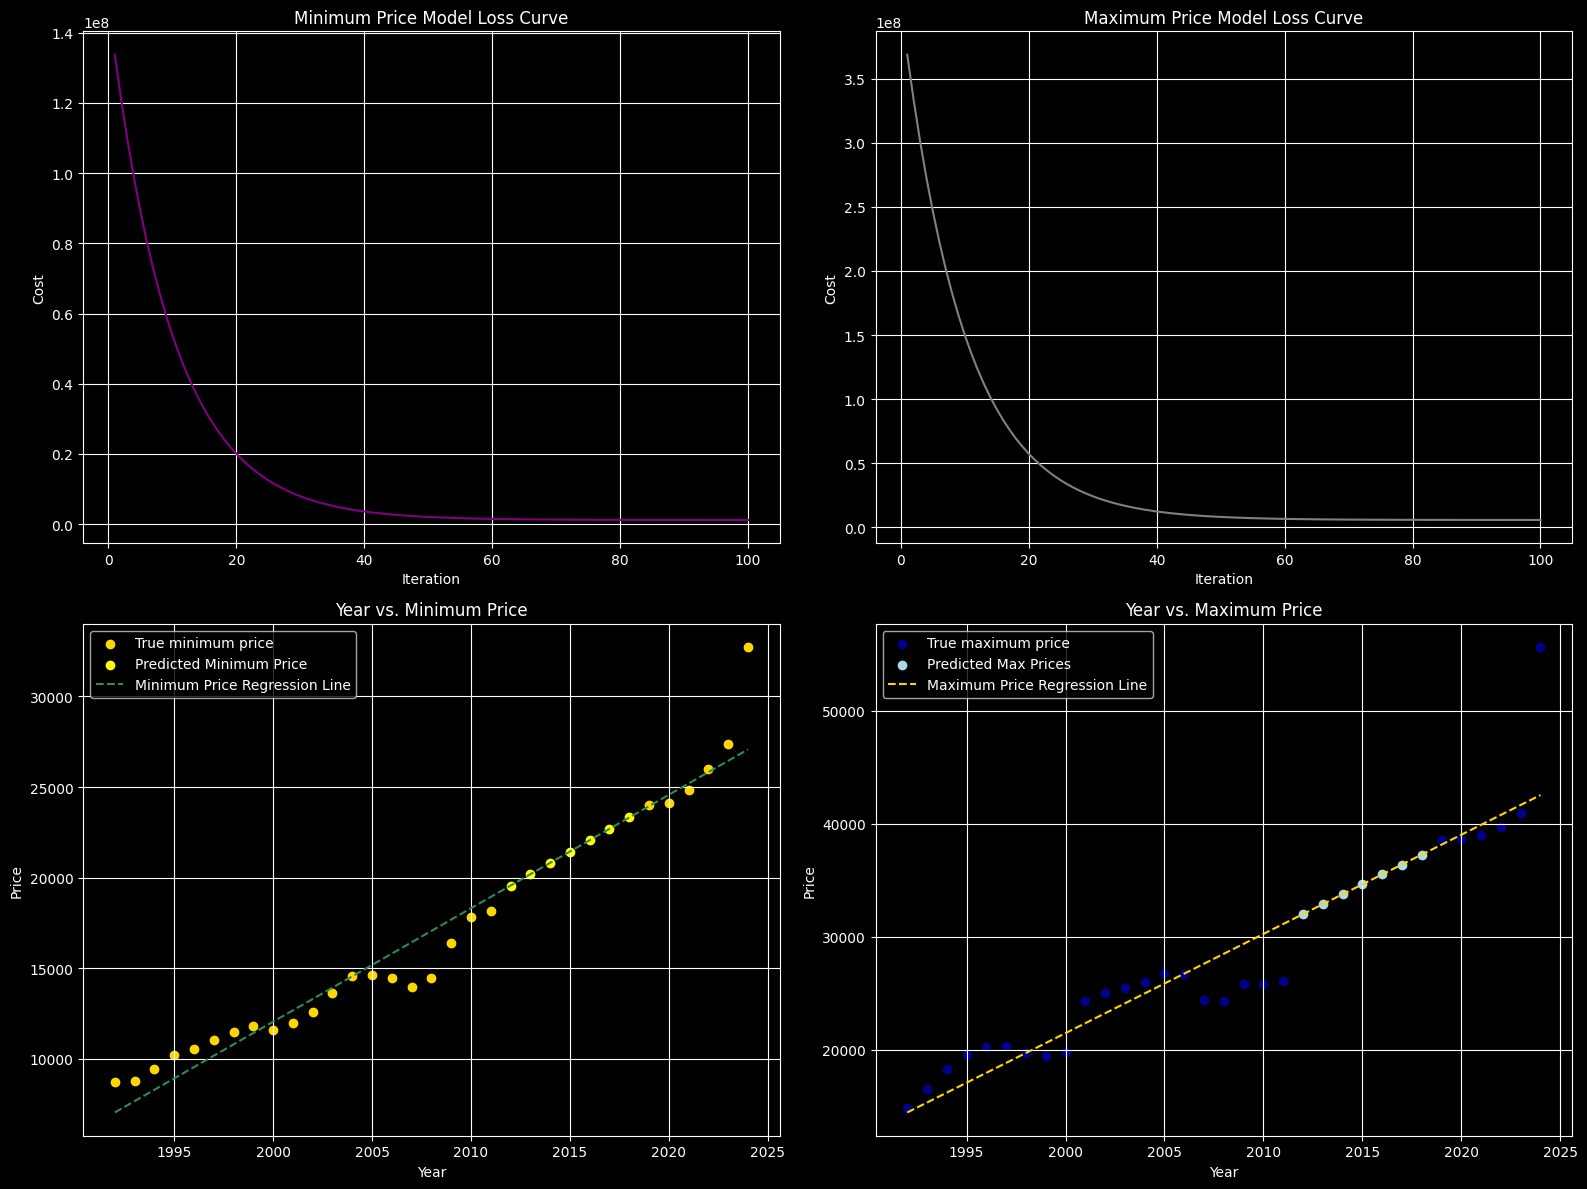

In [ ]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1) #loss curve for 1st plot of minimum price model.
plt.plot(range(1, iterations + 1), cost_history_min, color='purple')
plt.title('Minimum Price Model Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)

plt.subplot(2, 2, 2) #loss curve for 2nd plot of mmaximum price model.
plt.plot(range(1, iterations + 1), cost_history_max, color='gray')
plt.title('Maximum Price Model Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)

plt.subplot(2, 2, 3) #minimum price vs year plot
plt.scatter(years, minimum_price, color='gold', label='True minimum price')
plt.scatter(missingyears, predicted_minimumprice, color='yellow', label='Predicted Minimum Price')
all_years_sorted = np.sort(np.concatenate((years, missingyears)))
all_years_normalization_sorted = (all_years_sorted - years_mean) / years_standard
X_all_sorted = np.column_stack((np.ones_like(all_years_normalization_sorted), all_years_normalization_sorted))
plt.plot(all_years_sorted, hypothesis(X_all_sorted, theta_min), color='seagreen', linestyle='--', label='Minimum Price Regression Line')
plt.title('Year vs. Minimum Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4) #same but for maximum price
plt.scatter(years, maximum_price, color='darkblue', label='True maximum price')
plt.scatter(missingyears, predicted_maximumprice, color='lightblue', label='Predicted Max Prices')
plt.plot(all_years_sorted, hypothesis(X_all_sorted, theta_max), color='gold', linestyle='--', label='Maximum Price Regression Line')
plt.title('Year vs. Maximum Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print("\nTheta values after training are")
print(f"Minimum Price Model: Theta_0 = {theta_min[0]:.4f}, Theta_1 (Slope) = {theta_min[1]:.4f}")
print(f"Maximum Price Model: Theta_0 = {theta_max[0]:.4f}, Theta_1 (Slope) = {theta_max[1]:.4f}") #printing theta


Theta values after training are
Minimum Price Model: Theta_0 = 15882.6753, Theta_1 (Slope) = 6171.8195
Maximum Price Model: Theta_0 = 26844.1220, Theta_1 (Slope) = 8650.5945


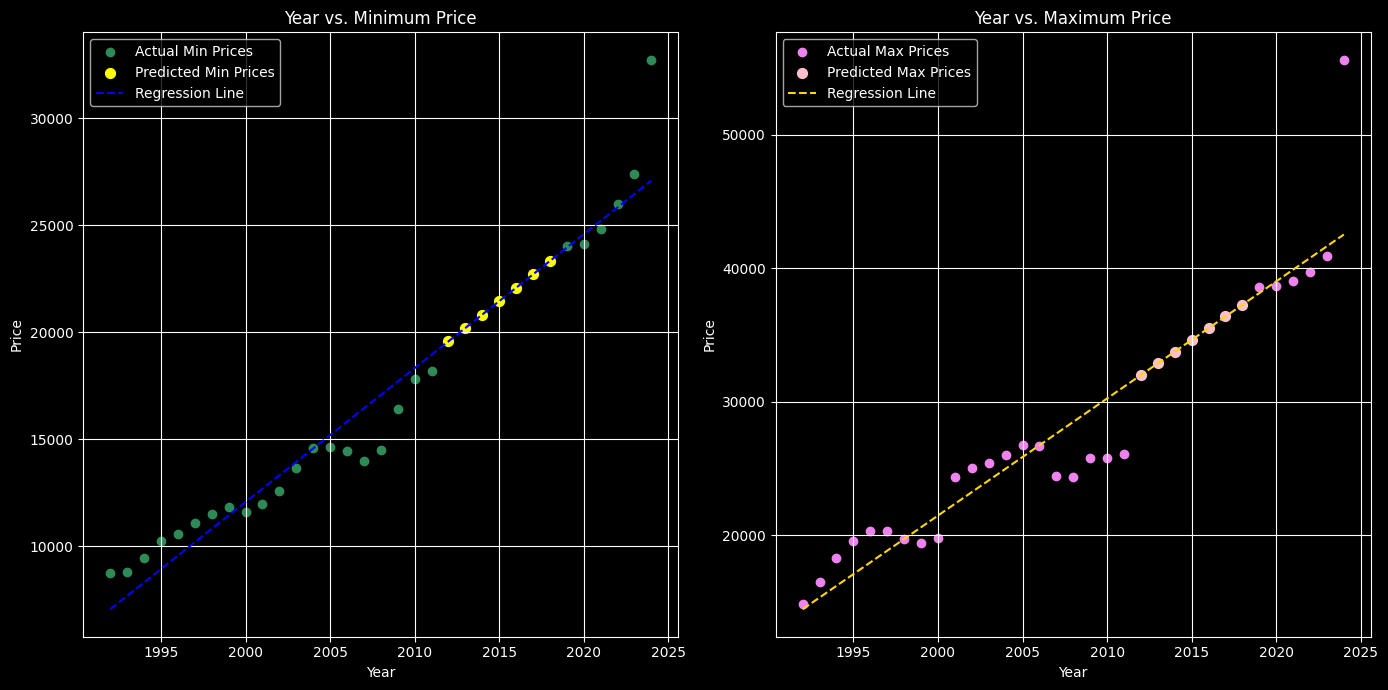

In [ ]:
plt.figure(figsize=(14, 7))
#this is for price and year
plt.subplot(1, 2, 1) #minimum
plt.scatter(years, minimum_price, color='seagreen', label='Actual Min Prices')
plt.scatter(missingyears, predicted_minimumprice, color='yellow', label='Predicted Min Prices', s=50)
plt.plot(all_years_sorted, hypothesis(X_all_sorted, theta_min), color='blue', linestyle='--', label='Regression Line')
plt.title('Year vs. Minimum Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2) #maximum
plt.scatter(years, maximum_price, color='violet', label='Actual Max Prices')
plt.scatter(missingyears, predicted_maximumprice, color='pink', label='Predicted Max Prices', s=50)
plt.plot(all_years_sorted, hypothesis(X_all_sorted, theta_max), color='gold', linestyle='--', label='Regression Line')
plt.title('Year vs. Maximum Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
predict_year = 2025 #this is for 2025 price prediction
predict_year_normalization = (predict_year - years_mean) / years_standard
X_predict = np.array([1, predict_year_normalization])

predicted_minimumprice_2025 = hypothesis(X_predict, theta_min)
predicted_maximumprice_2025 = hypothesis(X_predict, theta_max)

print(f"\nPredicted price range for Ford Ranger in {predict_year}:")
print(f"Minimum Price: ${predicted_minimumprice_2025:.2f}")
print(f"Maximum Price: ${predicted_maximumprice_2025:.2f}")

print(f"\nTheta_min: {theta_min}")
print(f"Theta_max: {theta_max}")


Predicted price range for Ford Ranger in 2025:
Minimum Price: $27701.20
Maximum Price: $43409.30

Theta_min: [15882.67534143  6171.81947011]
Theta_max: [26844.12202893  8650.59448273]


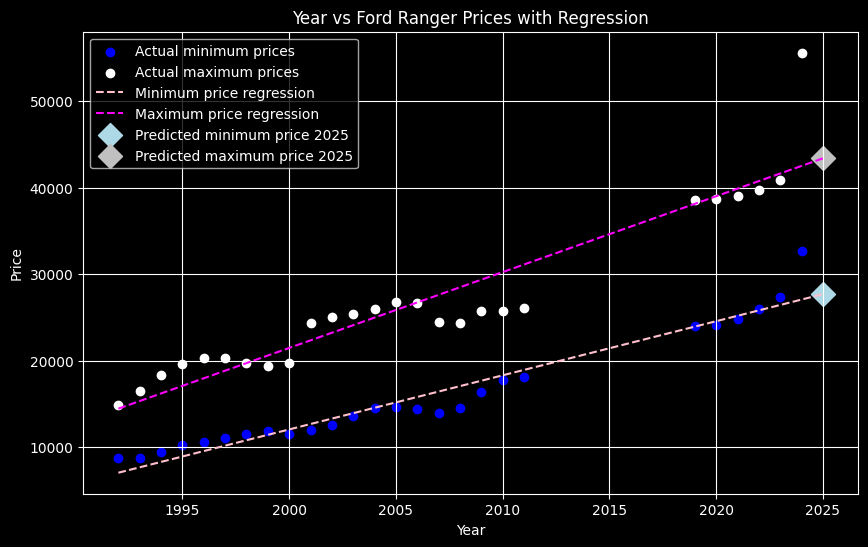

In [ ]:
plt.figure(figsize=(10, 6)) #this is training data with our regression
plt.scatter(years, minimum_price, color='blue', label='Actual minimum prices')
plt.scatter(years, maximum_price, color='white', label='Actual maximum prices')

year_range = np.linspace(years.min(), predict_year, 300)
year_range_normalization = (year_range - years_mean) / years_standard
X_range = np.column_stack((np.ones_like(year_range_normalization), year_range_normalization))

min_price_predicted = hypothesis(X_range, theta_min) #for minimum price line
plt.plot(year_range, min_price_predicted, color='pink', linestyle='--', label='Minimum price regression')

# Plot Max Price Regression Line
max_price_predicted = hypothesis(X_range, theta_max)
plt.plot(year_range, max_price_predicted, color='magenta', linestyle='--', label='Maximum price regression')

# Highlight the 2025 prediction
plt.scatter(predict_year, predicted_minimumprice_2025, color='lightblue', label='Predicted minimum price 2025', marker='D', s=150)
plt.scatter(predict_year, predicted_maximumprice_2025, color='Silver', label='Predicted maximum price 2025', marker='D', s=150)

plt.title('Year vs Ford Ranger Prices with Regression')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

# **Summary:**
The predicted price by my program for the 2025 Ford Ranger is at minimum of 27701usd and maximum of 434094usd. Theta values at the end for theta 0 minimum = 15882.67, theta 1 minimum = 6171.81, theta 0 maximum = 26844.12, theta 1 maximum = 8650.59.       Overall, the model seems to be performing well with the given limited price data in predicting the missing prices from 2012-2018. But the predicted price for 2025 Ford Ranger doesn’t seem right at all. But there is not much data, and other factors to consider. So, the input data to train was quite limited. To improve the model, I tried experimenting with various values for learning rate, etc,.. but in the end I couldn’t implement even regularization which I learnt in here due to the lack of data overall. Performance wise, the loss curve has shown a consistent decrease in cost which is a good sign that the gradient descent minimized the error over time. No, I’m not buying a next generation Range Rover, I’m just a broke student for now! 😥



```
Code:

https://colab.research.google.com/drive/14ML8Md4TG1pwKzaQcPxagIafq9nrfdM_?usp=sharing
```